<a href="https://colab.research.google.com/github/dikshank/SPORTY-GURU-ASSIGNMENT/blob/main/ASSIGNMENT_(SPORTY_GURU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Flatten,BatchNormalization,ReLU,Conv2D,MaxPool2D,Dropout
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [102]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [103]:
x_train.shape

(50000, 32, 32, 3)

In [104]:
y_train.shape

(50000, 1)

In [105]:
x_test.shape

(10000, 32, 32, 3)

In [106]:
y_test.shape

(10000, 1)

# First network (NetA)

In [135]:
class NetA():
  @staticmethod
  def Network_A():
    
    NetA = Sequential(name="NetA")
    NetA.add(InputLayer(input_shape=(32,32,3)))
    NetA.add(Flatten())
    
    
    NetA.add(Dense(units=10,activation="softmax"))
    
    return NetA

In [136]:
NetworkA = NetA.Network_A()

In [137]:
NetworkA.summary()

Model: "NetA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 3072)              0         
                                                                 
 dense_13 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [138]:
# NetA_optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.001, beta_1=0.3)

In [139]:
NetworkA.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [140]:
NetA_performance = NetworkA.fit(x_train, y_train, batch_size=250,validation_data=(x_test,y_test),epochs=50,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 90.0530 - accuracy: 0.2102 - val_loss: 81.7755 - val_accuracy: 0.2005
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 60.3531 - accuracy: 0.2406 - val_loss: 55.0481 - val_accuracy: 0.2355
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 62.8500 - accuracy: 0.2480 - val_loss: 62.4991 - val_accuracy: 0.2485
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 61.8915 - accuracy: 0.2595 - val_loss: 35.1649 - val_accuracy: 0.3020
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 56.8986 - accuracy: 0.2626 - val_loss: 48.4710 - val_accuracy: 0.3115
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 59.1272 - accuracy: 0.2614 - val_loss: 59.7942 - val_accuracy: 0.2615
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 57.4475 - accuracy: 0.2639 - val_loss: 55.4156 - val_accuracy:

In [141]:
NetA_training_loss = NetA_performance.history['loss']

In [142]:
NetA_test_loss = NetA_performance.history['val_loss']

In [143]:
NetA_epoches = range(1,len(NetA_training_loss)+1)

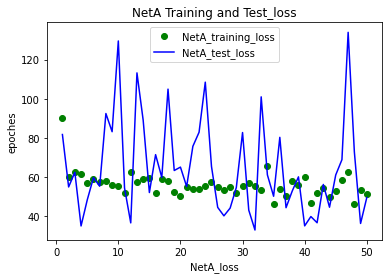

In [144]:
plt.plot(NetA_epoches,NetA_training_loss,'go',label='NetA_training_loss')
plt.plot(NetA_epoches,NetA_test_loss,'b',label='NetA_test_loss')
plt.title('NetA Training and Test_loss')
plt.xlabel('NetA_loss')
plt.ylabel('epoches')
plt.legend()
plt.show()

# Second network (NetB)

In [145]:
# making the data zero mean and one std
norm_x_train = tf.image.per_image_standardization(x_train)
norm_x_test = tf.image.per_image_standardization(x_test)

In [146]:
class NetB:
  @staticmethod  
  def Network_B():
      
      NetB = Sequential(name="NetB")
      NetB.add(InputLayer(input_shape=(32,32,3)))
      NetB.add(Flatten())
      
      NetB.add(Dense(units=300,kernel_initializer='glorot_normal',kernel_regularizer=l2(l=0.01)))
      NetB.add(BatchNormalization())
      NetB.add(ReLU())

      # NetB.add(Dropout(0.25))
      NetB.add(Dense(units=10,activation="softmax"))
      
      return NetB

In [147]:
NetworkB = NetB.Network_B()

In [148]:
NetworkB.summary()

Model: "NetB"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 3072)              0         
                                                                 
 dense_14 (Dense)            (None, 300)               921900    
                                                                 
 batch_normalization_2 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 re_lu_9 (ReLU)              (None, 300)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                3010      
                                                                 
Total params: 926,110
Trainable params: 925,510
Non-trainable params: 600
______________________________________________________

In [149]:
NetworkB.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [150]:
NetB_performance = NetworkB.fit(norm_x_train, y_train, batch_size=250,validation_data=(norm_x_test,y_test),epochs=50,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 5ms/step - loss: 2.9758 - accuracy: 0.4081 - val_loss: 1.8241 - val_accuracy: 0.4337
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 1.8061 - accuracy: 0.4389 - val_loss: 1.8079 - val_accuracy: 0.4283
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 1.7882 - accuracy: 0.4442 - val_loss: 1.7516 - val_accuracy: 0.4448
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 1.7654 - accuracy: 0.4527 - val_loss: 1.7910 - val_accuracy: 0.4380
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 1.7559 - accuracy: 0.4526 - val_loss: 1.7567 - val_accuracy: 0.4580
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 1.7475 - accuracy: 0.4540 - val_loss: 1.7430 - val_accuracy: 0.4503
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 1.7374 - accuracy: 0.4586 - val_loss: 1.7521 - val_accuracy: 0.4524
Epoch 

In [151]:
NetB_training_loss = NetB_performance.history['loss']

In [152]:
NetB_test_loss = NetB_performance.history['val_loss']

In [153]:
NetB_epoches = range(1,len(NetB_training_loss)+1)

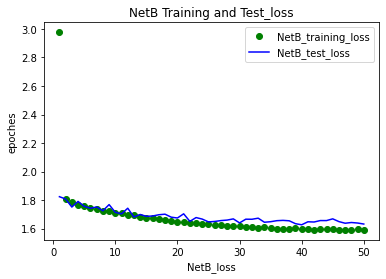

In [154]:
plt.plot(NetB_epoches,NetB_training_loss,'go',label='NetB_training_loss')
plt.plot(NetB_epoches,NetB_test_loss,'b',label='NetB_test_loss')
plt.title('NetB Training and Test_loss')
plt.xlabel('NetB_loss')
plt.ylabel('epoches')
plt.legend()
plt.show()

# Third network(NetC)

In [155]:
# normalising the pixel values for better computation
train_norm = x_train / 255.0
test_norm = x_test / 255.0

In [157]:
class NetC:
  @staticmethod
  def Network_C():
    
    NetC = Sequential(name="NetC")
    NetC.add(InputLayer(input_shape=(32,32,3)))
   
    NetC.add(Conv2D(filters=25,kernel_size=5,padding="valid",input_shape=(32,32,3),kernel_initializer='glorot_normal',use_bias=True,kernel_regularizer='l2'))
    NetC.add(MaxPool2D(strides=2))
    NetC.add(ReLU())

    NetC.add(Flatten())
    NetC.add(Dense(units=10,activation="softmax"))
    
    return NetC

In [158]:
NetworkC = NetC.Network_C()

In [159]:
NetworkC.summary()

Model: "NetC"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 25)        1900      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 25)       0         
 2D)                                                             
                                                                 
 re_lu_10 (ReLU)             (None, 14, 14, 25)        0         
                                                                 
 flatten_15 (Flatten)        (None, 4900)              0         
                                                                 
 dense_16 (Dense)            (None, 10)                49010     
                                                                 
Total params: 50,910
Trainable params: 50,910
Non-trainable params: 0
__________________________________________________________

In [160]:
NetworkC.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [161]:
NetC_performance = NetworkC.fit(train_norm,y_train,batch_size=250,validation_data = (test_norm,y_test),epochs=50,verbose=1)

Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 1.7998 - accuracy: 0.3829 - val_loss: 1.5686 - val_accuracy: 0.4687
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 1.4850 - accuracy: 0.4971 - val_loss: 1.4108 - val_accuracy: 0.5268
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 1.3719 - accuracy: 0.5407 - val_loss: 1.3516 - val_accuracy: 0.5423
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 1.3112 - accuracy: 0.5608 - val_loss: 1.3172 - val_accuracy: 0.5545
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 1.2598 - accuracy: 0.5805 - val_loss: 1.2885 - val_accuracy: 0.5617
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 1.2292 - accuracy: 0.5929 - val_loss: 1.2524 - val_accuracy: 0.5768
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 1.1914 - accuracy: 0.6062 - val_loss: 1.2258 - val_accuracy: 0.5876
Epoch 

In [162]:
NetC_training_loss = NetC_performance.history['loss']

In [163]:
NetC_test_loss = NetC_performance.history['val_loss']

In [164]:
NetC_epoches = range(1,len(NetC_training_loss)+1)

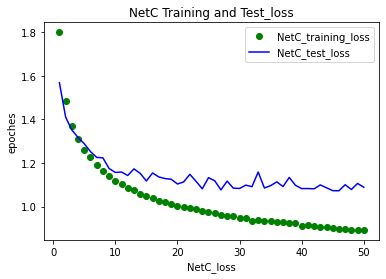

In [166]:
plt.plot(NetC_epoches,NetC_training_loss,'go',label='NetC_training_loss')
plt.plot(NetC_epoches,NetC_test_loss,'b',label='NetC_test_loss')
plt.title('NetC Training and Test_loss')
plt.xlabel('NetC_loss')
plt.ylabel('epoches')
plt.legend()
plt.show()

# Summary and Ploting Accuracy History

In [191]:
NetA_training_accuracy = NetworkA.evaluate(x_train,y_train)
NetA_test_accuracy = NetworkA.evaluate(x_test,y_test)

NetB_training_accuracy = NetworkB.evaluate(x_train,y_train)
NetB_test_accuracy = NetworkB.evaluate(x_test,y_test)

NetC_training_accuracy = NetworkC.evaluate(x_train,y_train)
NetC_test_accuracy = NetworkC.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 364.9128 - accuracy: 0.4584


In [196]:
pip install colorama

In [204]:
import colorama
from colorama import Fore

print(Fore.GREEN +f'NetA training accuracy: {NetA_training_accuracy[1]}')
print(Fore.BLUE +f'NetA test accuracy: {NetA_test_accuracy[1]}')
print()
print(Fore.GREEN +f'NetB training accuracy: {NetB_training_accuracy[1]}')
print(Fore.BLUE +f'NetB test accuracy: {NetB_test_accuracy[1]}')
print()
print(Fore.GREEN +f'NetC training accuracy: {NetC_training_accuracy[1]}')
print(Fore.BLUE +f'NetC test accuracy: {NetC_test_accuracy[1]}')

NetA training accuracy: 0.2625199854373932
NetA test accuracy: 0.24869999289512634

NetB training accuracy: 0.4059399962425232
NetB test accuracy: 0.37709999084472656

NetC training accuracy: 0.4886400103569031
NetC test accuracy: 0.45840001106262207


In [187]:
# Getting the accuracy histories

NetA_training_accuracy_hist = NetA_performance.history['accuracy']
NetA_test_accuracy_hist = NetA_performance.history['val_accuracy']

NetB_training_accuracy_hist = NetB_performance.history['accuracy']
NetB_test_accuracy_hist = NetB_performance.history['val_accuracy']

NetC_training_accuracy_hist = NetC_performance.history['accuracy']
NetC_test_accuracy_hist = NetC_performance.history['val_accuracy']

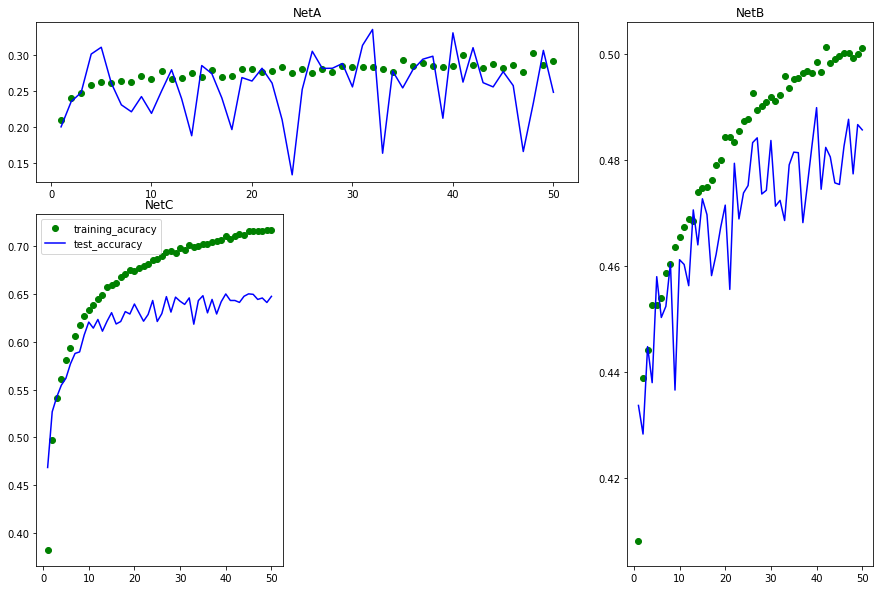

In [188]:
# Plotting the accuracy histories

plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3, colspan=2)
plot3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)

plot1.plot(NetA_epoches,NetA_training_accuracy_hist,'go',label='training_accuracy')
plot1.plot(NetA_epoches,NetA_test_accuracy_hist,'b',label='test_accuracy')
plot1.set_title('NetA')

plot2.plot(NetB_epoches,NetB_training_accuracy_hist,'go',label='training_accuracy')
plot2.plot(NetB_epoches,NetB_test_accuracy_hist,'b',label='test_accuracy')
plot2.set_title('NetB')

plot3.plot(NetC_epoches,NetC_training_accuracy_hist,'go',label='training_acuracy')
plot3.plot(NetC_epoches,NetC_test_accuracy_hist,'b',label='test_accuracy')
plot3.set_title('NetC')
plt.gcf().set_size_inches(15, 10)

plt.legend()
plt.show()